## Imports and functions

In [1]:
#!/usr/bin/env python3
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn import metrics, preprocessing
import numpy as np
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



def find_class_weights(y_labels):
  class_weights = class_weight.compute_class_weight(
                                          class_weight = "balanced",
                                          classes = np.unique(y_labels),
                                          y = y_labels
                                      )
  label2id = {k:i for i, k in enumerate(sorted(set(y_labels)))}
  # class_weights = dict(zip(list(label2id.values()), class_weights))
  class_weights = dict(zip(np.unique(y_labels), class_weights))
  # print(class_weights)
  return class_weights


def load_csv(filename):
  df = pd.read_csv(filename, header=None)

  df = df.sample(frac=1).reset_index(drop=True)
  labels=df.iloc[:,-1]

  return df, labels

def remove_classes(dataframe, lbl):
    # find removable classes if they have less than 10 instances
    removables = [label for label, count in Counter(lbl).items() if count <= 10]
    # print(removables)
    dataframe = dataframe[~dataframe[dataframe.columns[-1]].isin(removables)]

    # dataframe = dataframe.loc[0:1000] # uncomment for test
    features=dataframe.iloc[:,0:-2]
    labels=dataframe.iloc[:,-1]
    return features, labels





def classify_linearSVC(X_train, X_test, y_train, y_test, class_weight, vec_type ="i-vector", dataname = "archimob"):
  class_names = set(y_train)
  lsvc = LinearSVC(C=0.01, class_weight=class_weight)
  classifier = lsvc.fit(X_train, y_train)
  score = lsvc.score(X_train, y_train)
  print("Score: ", score)
  y_pred = lsvc.predict(X_test)
  print(vec_type+" accuracy:",accuracy_score(y_test, y_pred))
  print(vec_type+" F1:", f1_score(y_test, y_pred, average='macro'))
  print(f"Report: vector type ", vec_type )
  print(classification_report(y_test, y_pred))


  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  titles_options = [
      (dataname + ": " +vec_type+" confmatrix, non_normalized   ", None),
      (dataname + ": " +vec_type+" confmatrix, normalized       ", "true"),
  ]
  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_estimator(
          classifier,
          X_test,
          y_test,
          display_labels=class_names,
          cmap=plt.cm.Reds,
          normalize=normalize,
      )
      # disp.ax_.set_title(title)

      print(title)
      print(disp.confusion_matrix)
      plt.savefig(title+'.png', dpi=800)

  plt.show()






## Speaker Identification

<ipython-input-2-76eddbcc7205>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df1.append(df2, ignore_index=True)


training size: 40320
testing size: 10081
class weights {'AG': 0.7119014251132992, 'BE': 1.2152488659665692, 'BS': 1.3927503204671698, 'GL': 3.5432557296856597, 'LU': 1.2766082443943993, 'NW': 3.6026526664824536, 'ZH': 0.36882602545968884}
Score:  0.4193204365079365
mfcc-vectors accuracy: 0.39777799821446286
mfcc-vectors F1: 0.3955014274283354
Report: vector type  mfcc-vectors
              precision    recall  f1-score   support

          AG       0.46      0.31      0.37      2159
          BE       0.36      0.31      0.33      1079
          BS       0.37      0.53      0.44      1280
          GL       0.25      0.72      0.38       739
          LU       0.41      0.43      0.42       945
          NW       0.31      0.65      0.42       511
          ZH       0.62      0.32      0.42      3368

    accuracy                           0.40     10081
   macro avg       0.40      0.47      0.40     10081
weighted avg       0.46      0.40      0.40     10081

archimob speakers: mfcc-

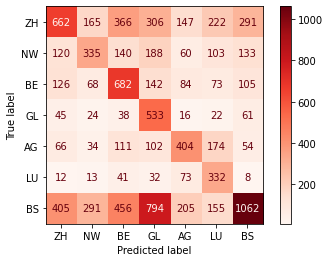

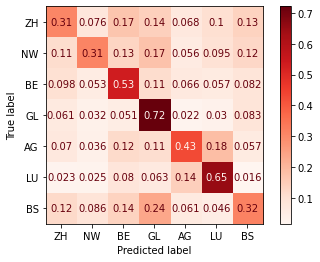

In [2]:
## mfcc vector speaker identification
df1, tr_labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_train_mfcc_vectors.csv")
df2, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_test_mfcc_vectors.csv")
df_merged = df1.append(df2, ignore_index=True)
features, labels= remove_classes(df_merged, tr_labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42,shuffle=True) 
print("training size:", len(X_train))
print("testing size:", len(X_test))

class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="mfcc-vectors", dataname = "archimob speakers")

<ipython-input-3-a3f061a4ab89>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df1.append(df2, ignore_index=True)


training size: 35432
testing size: 8859
class weights {'AG': 0.7444289065319379, 'BE': 1.0882682669480348, 'BS': 1.7140112172829247, 'GL': 2.616122384273938, 'LU': 1.3816560616208975, 'NW': 2.659977433913604, 'ZH': 0.2723184818481848, 'accent': 4125.625}
Score:  0.8306051027319937
i-vectors accuracy: 0.8136358505474659
i-vectors F1: 0.8063700615608729
Report: vector type  i-vectors
              precision    recall  f1-score   support

          AG       0.79      0.80      0.79      1662
          BE       0.81      0.84      0.82       936
          BS       0.75      0.86      0.80       946
          GL       0.74      0.89      0.81       740
          LU       0.76      0.83      0.79       693
          NW       0.73      0.86      0.79       506
          ZH       0.91      0.78      0.84      3376

    accuracy                           0.81      8859
   macro avg       0.78      0.84      0.81      8859
weighted avg       0.82      0.81      0.81      8859

archimob speakers:

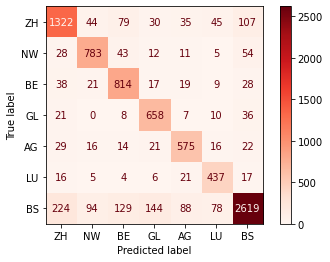

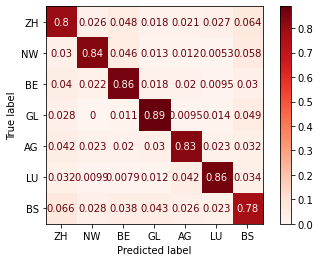

In [3]:
## i vector speaker identification
df1, tr_labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_train_ivectors.csv")
df2, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_test_ivectors.csv")
df_merged = df1.append(df2, ignore_index=True)
features, labels= remove_classes(df_merged, tr_labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42,shuffle=True) 
print("training size:", len(X_train))
print("testing size:", len(X_test))

class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="i-vectors", dataname = "archimob speakers")

<ipython-input-4-b5cc2e9ec9db>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df1.append(df2, ignore_index=True)


training size: 35432
testing size: 8859
class weights {'AG': 0.7444289065319379, 'BE': 1.0882682669480348, 'BS': 1.7140112172829247, 'GL': 2.616122384273938, 'LU': 1.3816560616208975, 'NW': 2.659977433913604, 'ZH': 0.2723184818481848, 'accent': 4125.625}


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score:  0.9731034093474825
x-vectors accuracy: 0.9617338300033864
x-vectors F1: 0.9627938918581097
Report: vector type  x-vectors
              precision    recall  f1-score   support

          AG       0.95      0.96      0.95      1672
          BE       0.95      0.96      0.95       976
          BS       0.95      0.98      0.97       970
          GL       0.95      0.98      0.97       686
          LU       0.94      0.98      0.96       681
          NW       0.97      0.98      0.97       515
          ZH       0.98      0.95      0.96      3359

    accuracy                           0.96      8859
   macro avg       0.96      0.97      0.96      8859
weighted avg       0.96      0.96      0.96      8859

archimob speakers: x-vectors confmatrix, non_normalized   
[[1597   12   10    3   13    1   36]
 [   9  937    6    3    3    0   18]
 [   7    3  954    3    0    0    3]
 [   0    0    3  673    3    1    6]
 [   4    2    1    4  666    1    3]
 [   1    1    2    1   

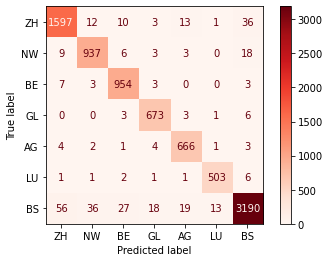

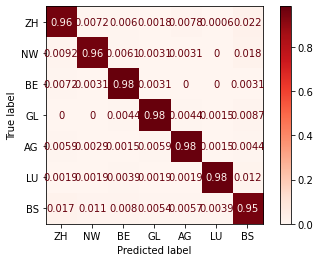

In [4]:
## x vector speaker identification
df1, tr_labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_train_xvectors.csv")
df2, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_test_xvectors.csv")
df_merged = df1.append(df2, ignore_index=True)
features, labels= remove_classes(df_merged, tr_labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42,shuffle=True) 
print("training size:", len(X_train))
print("testing size:", len(X_test))

class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="x-vectors", dataname = "archimob speakers")

## Language Identification

training size: 39114
testing size: 11287
class weights {'AG': 0.7119014251132992, 'BE': 1.2152488659665692, 'BS': 1.3927503204671698, 'GL': 3.5432557296856597, 'LU': 1.2766082443943993, 'NW': 3.6026526664824536, 'ZH': 0.36882602545968884}
Score:  0.4813366058188884
mfcc-vectors accuracy: 0.21927881633737928
mfcc-vectors F1: 0.18672236380517343
Report: vector type  mfcc-vectors
              precision    recall  f1-score   support

          AG       0.31      0.20      0.24      2843
          BE       0.08      0.06      0.07       943
          BS       0.39      0.19      0.26      2403
          GL       0.18      0.10      0.13      2032
          LU       0.09      0.35      0.14       428
          NW       0.17      0.13      0.15       924
          ZH       0.23      0.53      0.32      1714

    accuracy                           0.22     11287
   macro avg       0.21      0.22      0.19     11287
weighted avg       0.25      0.22      0.21     11287

archimob: mfcc-vectors 

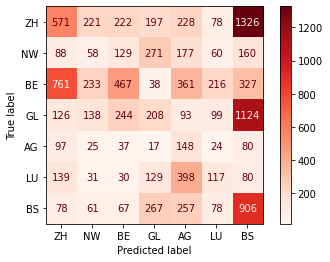

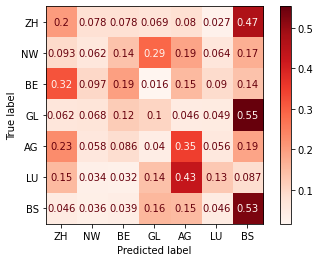

In [5]:
## mfcc vector language identification
df, tr_labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_train_mfcc_vectors.csv")
X_train, y_train = remove_classes(df, tr_labels)
print("training size:", len(X_train))

df, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_test_mfcc_vectors.csv")
X_test, y_test = remove_classes(df, labels)
print("testing size:", len(X_test))

class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="mfcc-vectors", dataname = "archimob")


training size: 33004
testing size: 11287
class weights {'AG': 0.7119014251132992, 'BE': 1.2152488659665692, 'BS': 1.3927503204671698, 'GL': 3.5432557296856597, 'LU': 1.2766082443943993, 'NW': 3.6026526664824536, 'ZH': 0.36882602545968884}
Score:  0.897345776269543
i-vectors accuracy: 0.19907858598387526
i-vectors F1: 0.15344951471742332
Report: vector type  i-vectors
              precision    recall  f1-score   support

          AG       0.24      0.13      0.17      2843
          BE       0.13      0.15      0.14       943
          BS       0.09      0.01      0.01      2403
          GL       0.27      0.10      0.14      2032
          LU       0.14      0.49      0.22       428
          NW       0.05      0.04      0.04       924
          ZH       0.23      0.74      0.35      1714

    accuracy                           0.20     11287
   macro avg       0.16      0.24      0.15     11287
weighted avg       0.18      0.20      0.15     11287

archimob: i-vectors confmatrix, n

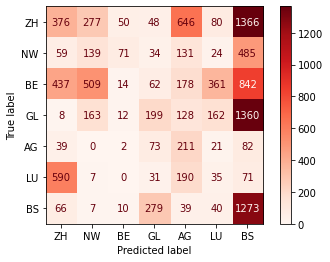

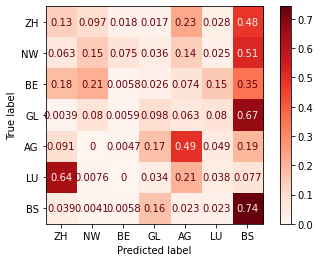

In [6]:
## i vector
df, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_train_ivectors.csv")
X_train, y_train = remove_classes(df, labels)
print("training size:", len(X_train))

df, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_test_ivectors.csv")
X_test, y_test = remove_classes(df, labels)
print("testing size:", len(X_test))

class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="i-vectors", dataname = "archimob")


training size: 33004
testing size: 11287
class weights {'AG': 0.7119014251132992, 'BE': 1.2152488659665692, 'BS': 1.3927503204671698, 'GL': 3.5432557296856597, 'LU': 1.2766082443943993, 'NW': 3.6026526664824536, 'ZH': 0.36882602545968884}


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score:  0.987001575566598
x-vectors accuracy: 0.1726765305218393
x-vectors F1: 0.12422355897369333
Report: vector type  x-vectors
              precision    recall  f1-score   support

          AG       0.18      0.09      0.12      2843
          BE       0.02      0.02      0.02       943
          BS       0.05      0.00      0.00      2403
          GL       0.36      0.14      0.21      2032
          LU       0.15      0.40      0.22       428
          NW       0.02      0.01      0.01       924
          ZH       0.18      0.70      0.29      1714

    accuracy                           0.17     11287
   macro avg       0.14      0.20      0.12     11287
weighted avg       0.16      0.17      0.12     11287

archimob: x-vectors confmatrix, non_normalized   
[[ 243  245   18   12  533   34 1758]
 [  30   18   17   47   95   12  724]
 [ 215  529    6    1   76  128 1448]
 [   7   54   88  294   78  137 1374]
 [  49    0    0  124  173    7   75]
 [ 783    1    0    2  107    9  

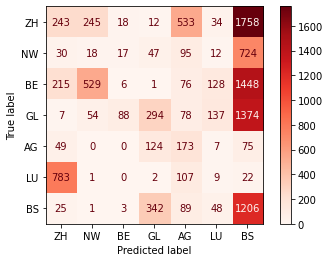

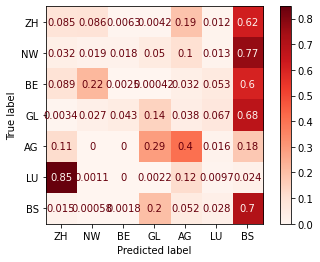

In [7]:
## x vector
df, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_train_xvectors.csv")
X_train, y_train = remove_classes(df, labels)
print("training size:", len(X_train))

df, labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/archimob/archimob_test_xvectors.csv")
X_test, y_test = remove_classes(df, labels)
print("testing size:", len(X_test))

class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="x-vectors", dataname = "archimob")


In [8]:


# # # Gridsearch to determine the value of C
# param_grid = {'C':np.arange(1, 100, 10)}
# linearSVC = GridSearchCV(LinearSVC(),param_grid,cv=5,return_train_score=True)
# linearSVC.fit(X_train,y_train)
# print(linearSVC.best_params_)

# bestlinearSVC = linearSVC.best_estimator_
# bestlinearSVC.fit(X_train,y_train)
# bestlinearSVC.score(X_train,y_train)
# y_pred = bestlinearSVC.predict(X_test)
# print("Accuracy on Linear SVC :",accuracy_score(y_test, y_pred))
# print(f"Report Classifier: vectors/SVC Linear ")
# print(classification_report(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# print("F1:", f1_score(y_test, y_pred, average='macro'))

# cf_matrix = confusion_matrix(y_test, y_pred)
# svm_plot = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# figure = svm_plot.get_figure()
# figure.savefig('isvm_conf_percentage.png', dpi=400)

# svm_plot = sns.heatmap(cf_matrix, annot=True,
#             fmt='.2%', cmap='Blues')
# figure = svm_plot.get_figure()
# figure.savefig('isvm_conf.png', dpi=400)
